# Data Pre-processing
### Import library

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
riders = pd.read_csv("Riders.csv")
riders.head()
# Age is the numbers of days since the rider delivered the first order

Rider Id  No_Of_Orders   Age  Average_Rating  No_of_Ratings
0  Rider_Id_396          2946  2298            14.0           1159
1  Rider_Id_479           360   951            13.5            176
2  Rider_Id_648          1746   821            14.3            466
3  Rider_Id_753           314   980            12.5             75
4  Rider_Id_335           536  1113            13.7            156

In [3]:
riders.shape

(960, 5)

In [4]:
riders.describe()

No_Of_Orders          Age  Average_Rating  No_of_Ratings
count    960.000000   960.000000      960.000000     960.000000
mean    1864.851042  1200.234375       13.412604     427.983333
std     1880.337785   810.930171        2.675794     486.957931
min        2.000000    96.000000        0.000000       0.000000
25%      261.750000   478.250000       13.500000      30.000000
50%     1475.500000  1021.000000       14.000000     223.000000
75%     2847.250000  1891.500000       14.300000     678.750000
max     9756.000000  3764.000000       15.200000    2298.000000

In [5]:
riders.columns

Index(['Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'], dtype='object')

In [6]:
# Rename the column so that it is compatible with pandas's dot notation
riders = riders.rename(columns = {"Rider Id": "Rider_Id"})
riders.head()

Rider_Id  No_Of_Orders   Age  Average_Rating  No_of_Ratings
0  Rider_Id_396          2946  2298            14.0           1159
1  Rider_Id_479           360   951            13.5            176
2  Rider_Id_648          1746   821            14.3            466
3  Rider_Id_753           314   980            12.5             75
4  Rider_Id_335           536  1113            13.7            156

In [7]:
train = pd.read_csv("train.csv")
train.head()

Order No       User Id Vehicle Type  Platform Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal or Business  Placement - Day of Month  \
0             Business                         9   
1             Personal                        12   
2             Business                        30   
3             Business                        15   
4             Personal                        13   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             5       9:35:46 AM                            9   
1                             5      11:16:16 AM                           12   
2                             2      12:39:25 PM                           30   
3                             5       9:25:34 AM                           15   
4                             1       9:55:18 AM                           13   

   Confirmation - Weekday (Mo = 1)  ... Arrival at Destination - Time  \
0                                5  ...                   10:39:55 AM   
1                                5  ...                   12:17:22 PM   
2                                2  ...                    1:00:38 PM   
3                                5  ...                   10:05:27 AM   
4                                1  ...                   10:25:37 AM   

   Distance (KM)  Temperature Precipitation in millimeters  Pickup Lat  \
0              4         20.4                          NaN   -1.317755   
1             16         26.4                          NaN   -1.351453   
2              3          NaN                          NaN   -1.308284   
3              9         19.2                          NaN   -1.281301   
4              9         15.4                          NaN   -1.266597   

   Pickup Long Destination Lat  Destination Long      Rider Id  \
0    36.830370       -1.300406         36.829741  Rider_Id_432   
1    36.899315       -1.295004         36.814358  Rider_Id_856   
2    36.843419       -1.300921         36.828195  Rider_Id_155   
3    36.832396       -1.257147         36.795063  Rider_Id_855   
4    36.792118       -1.295041         36.809817  Rider_Id_770   

  Time from Pickup to Arrival  
0                         745  
1                        1993  
2                         455  
3                        1341  
4                        1214  

[5 rows x 29 columns]

### *Change the columns name so that it is compatible with pandas*

In [8]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [9]:
columns = train.columns
new_columns = columns.str.replace("-", "")
new_columns = new_columns.str.replace("Mo = 1", "")
new_columns = new_columns.str.replace("()", "", regex = False)
new_columns = new_columns.str.replace(" ", "_")
train.columns = new_columns
train = train.rename(columns = {"Distance_(KM)": "Distance"})
train.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement__Day_of_Month',
       'Placement__Weekday_', 'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month', 'Arrival_at_Pickup__Weekday_',
       'Arrival_at_Pickup__Time', 'Pickup__Day_of_Month', 'Pickup__Weekday_',
       'Pickup__Time', 'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Precipitation_in_millimeters', 'Pickup_Lat',
       'Pickup_Long', 'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [10]:
import plotly.express as px

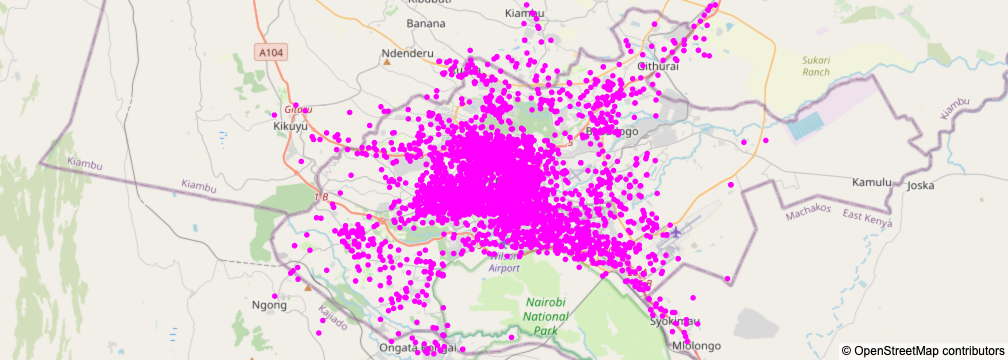

In [11]:
fig = px.scatter_mapbox(train, lat="Pickup_Lat", lon="Pickup_Long",
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

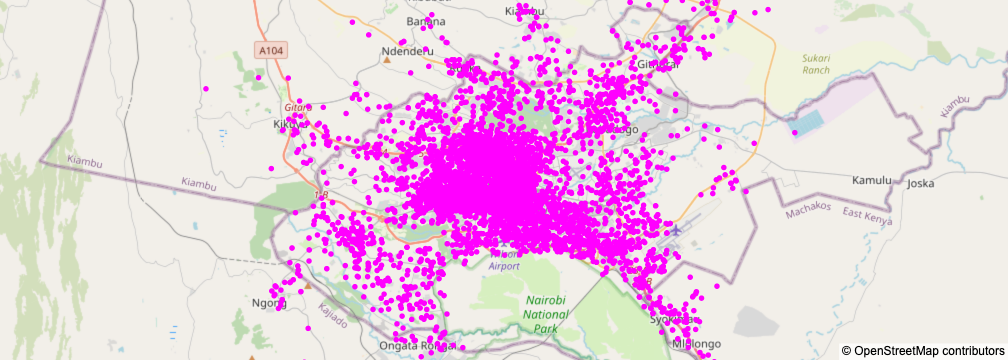

In [12]:
fig = px.scatter_mapbox(train, lat="Destination_Lat", lon="Destination_Long",
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### <font color='#eb3483'> Duplicates </font>

In [13]:
train[train.duplicated()].shape

(0, 29)

#### No duplicates found!!! Great! 

### <font color='#eb3483'> Missing Values </font>

In [14]:
train.isna().sum()/train.shape[0] # proportion missing in each column

Order_No                                0.000000
User_Id                                 0.000000
Vehicle_Type                            0.000000
Platform_Type                           0.000000
Personal_or_Business                    0.000000
Placement__Day_of_Month                 0.000000
Placement__Weekday_                     0.000000
Placement__Time                         0.000000
Confirmation__Day_of_Month              0.000000
Confirmation__Weekday_                  0.000000
Confirmation__Time                      0.000000
Arrival_at_Pickup__Day_of_Month         0.000000
Arrival_at_Pickup__Weekday_             0.000000
Arrival_at_Pickup__Time                 0.000000
Pickup__Day_of_Month                    0.000000
Pickup__Weekday_                        0.000000
Pickup__Time                            0.000000
Arrival_at_Destination__Day_of_Month    0.000000
Arrival_at_Destination__Weekday_        0.000000
Arrival_at_Destination__Time            0.000000
Distance            

In [15]:
train.drop(["Precipitation_in_millimeters"], axis = 1, inplace = True)
train.head()

Order_No       User_Id Vehicle_Type  Platform_Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal_or_Business  Placement__Day_of_Month  Placement__Weekday_  \
0             Business                        9                    5   
1             Personal                       12                    5   
2             Business                       30                    2   
3             Business                       15                    5   
4             Personal                       13                    1   

  Placement__Time  Confirmation__Day_of_Month  Confirmation__Weekday_  ...  \
0      9:35:46 AM                           9                       5  ...   
1     11:16:16 AM                          12                       5  ...   
2     12:39:25 PM                          30                       2  ...   
3      9:25:34 AM                          15                       5  ...   
4      9:55:18 AM                          13                       1  ...   

  Arrival_at_Destination__Weekday_  Arrival_at_Destination__Time  Distance  \
0                                5                   10:39:55 AM         4   
1                                5                   12:17:22 PM        16   
2                                2                    1:00:38 PM         3   
3                                5                   10:05:27 AM         9   
4                                1                   10:25:37 AM         9   

  Temperature  Pickup_Lat  Pickup_Long Destination_Lat  Destination_Long  \
0        20.4   -1.317755    36.830370       -1.300406         36.829741   
1        26.4   -1.351453    36.899315       -1.295004         36.814358   
2         NaN   -1.308284    36.843419       -1.300921         36.828195   
3        19.2   -1.281301    36.832396       -1.257147         36.795063   
4        15.4   -1.266597    36.792118       -1.295041         36.809817   

       Rider_Id Time_from_Pickup_to_Arrival  
0  Rider_Id_432                         745  
1  Rider_Id_856                        1993  
2  Rider_Id_155                         455  
3  Rider_Id_855                        1341  
4  Rider_Id_770                        1214  

[5 rows x 28 columns]

#### We could see that precipitation is missing a lot, DROP the column
- This Dataset only includes one that are carried by Bike. People might not use Bike when it is raining
- Since the data set significantly lacks Precipitation, DROP this variable
- Temperature is missing 20% of the data. Might be because they did not measured it

### Graph the total travel time and total distance using seaborn

### Distribution of distance

<AxesSubplot:xlabel='Distance', ylabel='Count'>

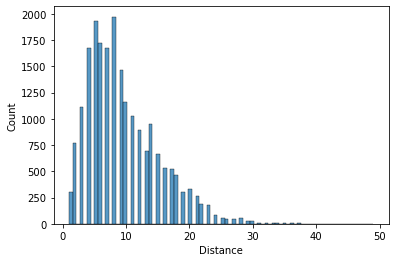

In [16]:
sns.histplot(data = train,  x = "Distance")

In [17]:
sns.regplot(data = train, y = "Time_from_Pickup_to_Arrival", x = "Distance")

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

### *We could draw a regression line but it is not that obvious. Also, the time varies a lot despite the distance being the same*

### Subset the data to Distance < 20

In [18]:
Dis_under_20 = train[train.Distance < 20]
Dis_under_20.head()

Order_No       User_Id Vehicle_Type  Platform_Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal_or_Business  Placement__Day_of_Month  Placement__Weekday_  \
0             Business                        9                    5   
1             Personal                       12                    5   
2             Business                       30                    2   
3             Business                       15                    5   
4             Personal                       13                    1   

  Placement__Time  Confirmation__Day_of_Month  Confirmation__Weekday_  ...  \
0      9:35:46 AM                           9                       5  ...   
1     11:16:16 AM                          12                       5  ...   
2     12:39:25 PM                          30                       2  ...   
3      9:25:34 AM                          15                       5  ...   
4      9:55:18 AM                          13                       1  ...   

  Arrival_at_Destination__Weekday_  Arrival_at_Destination__Time  Distance  \
0                                5                   10:39:55 AM         4   
1                                5                   12:17:22 PM        16   
2                                2                    1:00:38 PM         3   
3                                5                   10:05:27 AM         9   
4                                1                   10:25:37 AM         9   

  Temperature  Pickup_Lat  Pickup_Long Destination_Lat  Destination_Long  \
0        20.4   -1.317755    36.830370       -1.300406         36.829741   
1        26.4   -1.351453    36.899315       -1.295004         36.814358   
2         NaN   -1.308284    36.843419       -1.300921         36.828195   
3        19.2   -1.281301    36.832396       -1.257147         36.795063   
4        15.4   -1.266597    36.792118       -1.295041         36.809817   

       Rider_Id Time_from_Pickup_to_Arrival  
0  Rider_Id_432                         745  
1  Rider_Id_856                        1993  
2  Rider_Id_155                         455  
3  Rider_Id_855                        1341  
4  Rider_Id_770                        1214  

[5 rows x 28 columns]

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

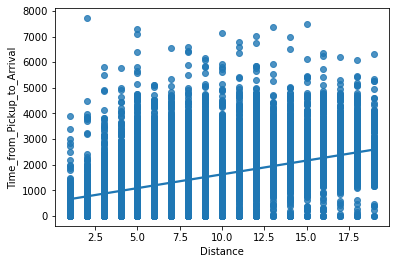

In [19]:
sns.regplot(data = Dis_under_20, y = "Time_from_Pickup_to_Arrival", x = "Distance")

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

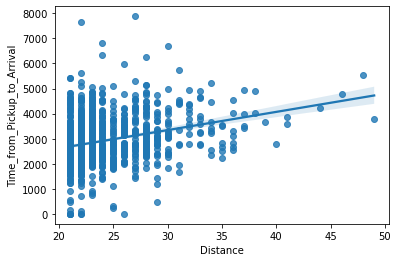

In [20]:
Dis_over_20 = train[train.Distance > 20]
sns.regplot(data = Dis_over_20, y = "Time_from_Pickup_to_Arrival", x = "Distance")

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

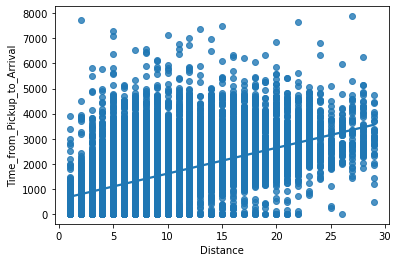

In [21]:
Dis_under_30 = train[train.Distance < 30]
sns.regplot(data = Dis_under_30, y = "Time_from_Pickup_to_Arrival", x = "Distance")

### There are some unrealistic Time, considering the distance they are covering. 

In [22]:
time_per_km = train.Time_from_Pickup_to_Arrival / train.Distance
avg_speed_km_per_hour = train.Distance / (train.Time_from_Pickup_to_Arrival / 3600)
train["Time_per_km"] = time_per_km
train["Avg_speed_km_per_hour"] = avg_speed_km_per_hour
train.head()

Order_No       User_Id Vehicle_Type  Platform_Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal_or_Business  Placement__Day_of_Month  Placement__Weekday_  \
0             Business                        9                    5   
1             Personal                       12                    5   
2             Business                       30                    2   
3             Business                       15                    5   
4             Personal                       13                    1   

  Placement__Time  Confirmation__Day_of_Month  Confirmation__Weekday_  ...  \
0      9:35:46 AM                           9                       5  ...   
1     11:16:16 AM                          12                       5  ...   
2     12:39:25 PM                          30                       2  ...   
3      9:25:34 AM                          15                       5  ...   
4      9:55:18 AM                          13                       1  ...   

  Distance  Temperature  Pickup_Lat Pickup_Long  Destination_Lat  \
0        4         20.4   -1.317755   36.830370        -1.300406   
1       16         26.4   -1.351453   36.899315        -1.295004   
2        3          NaN   -1.308284   36.843419        -1.300921   
3        9         19.2   -1.281301   36.832396        -1.257147   
4        9         15.4   -1.266597   36.792118        -1.295041   

   Destination_Long      Rider_Id  Time_from_Pickup_to_Arrival  Time_per_km  \
0         36.829741  Rider_Id_432                          745   186.250000   
1         36.814358  Rider_Id_856                         1993   124.562500   
2         36.828195  Rider_Id_155                          455   151.666667   
3         36.795063  Rider_Id_855                         1341   149.000000   
4         36.809817  Rider_Id_770                         1214   134.888889   

  Avg_speed_km_per_hour  
0             19.328859  
1             28.901154  
2             23.736264  
3             24.161074  
4             26.688633  

[5 rows x 30 columns]

In [23]:
avg_speed_km_per_hour.describe()

count    21201.000000
mean       249.305379
std       1905.297307
min          0.920245
25%         16.463415
50%         23.064602
75%         30.288462
max      61200.000000
dtype: float64

<AxesSubplot:ylabel='Avg_speed_km_per_hour'>

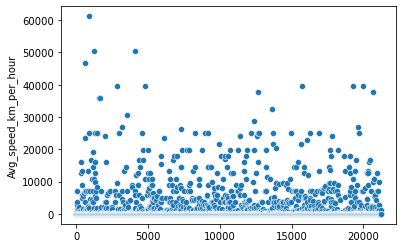

In [24]:
sns.scatterplot(data = train, x = train.index, y = "Avg_speed_km_per_hour")

<AxesSubplot:xlabel='Avg_speed_km_per_hour', ylabel='Count'>

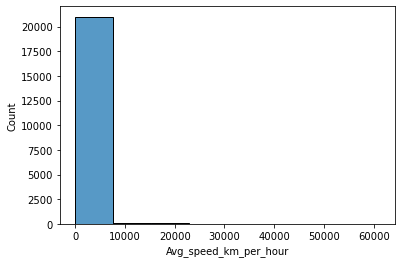

In [25]:
sns.histplot(data = train, x = "Avg_speed_km_per_hour", bins = 8)

### We could see that there are some Average speed that do not make sense. 
### Might need some data cleaning

In [26]:
# get all the df that has Avg_speed faster than 30 which is 75% 
train[train["Avg_speed_km_per_hour"] > 30].Avg_speed_km_per_hour
# There are 5000 entries that are faster than 30

10         30.681818
21         40.677966
27         35.355286
30         32.417830
36       7200.000000
            ...     
21187      37.784257
21188      39.130435
21196    1200.000000
21197      32.727273
21199      33.913043
Name: Avg_speed_km_per_hour, Length: 5436, dtype: float64

### Bike Average Speed according to Bike Lock Wiki: 
https://www.bikelockwiki.com/average-cycling-speed/

- Beginner Cyclist	8 - 12 mph (13 - 19 km/h)
- Intermediate Cyclist	12 - 16 mph (19 - 26 km/h)
- Advanced Cyclist	16 - 24 mph (26 - 39 km/h)
- Professional Cyclist	>24 mph (>39 km/h)

#### 40km / h is reasonable. Avg_speed going over 50km/h is pretty rediculus. Find all the values going faster than 50km/h

In [27]:
train_speed_over_50 = train[train["Avg_speed_km_per_hour"] > 50][["Distance", "Time_from_Pickup_to_Arrival", "Avg_speed_km_per_hour"]]
index_to_drop = train_speed_over_50.index
print(index_to_drop.shape)
print(train.shape)
print(train.shape[0] - index_to_drop.shape[0])

(1275,)
(21201, 30)
19926


### Drop all the rows that has Avg_speed of over 50km/h

In [28]:
new_train = train.drop(index = index_to_drop)
new_train

Order_No       User_Id Vehicle_Type  Platform_Type  \
0       Order_No_4211   User_Id_633         Bike              3   
1      Order_No_25375  User_Id_2285         Bike              3   
2       Order_No_1899   User_Id_265         Bike              3   
3       Order_No_9336  User_Id_1402         Bike              3   
4      Order_No_27883  User_Id_1737         Bike              1   
...               ...           ...          ...            ...   
21195   Order_No_9932  User_Id_3582         Bike              3   
21197  Order_No_22892  User_Id_1796         Bike              3   
21198   Order_No_2831  User_Id_2956         Bike              3   
21199   Order_No_6174  User_Id_2524         Bike              1   
21200   Order_No_9836   User_Id_718         Bike              3   

      Personal_or_Business  Placement__Day_of_Month  Placement__Weekday_  \
0                 Business                        9                    5   
1                 Personal                       12                    5   
2                 Business                       30                    2   
3                 Business                       15                    5   
4                 Personal                       13                    1   
...                    ...                      ...                  ...   
21195             Business                        2                    6   
21197             Business                       13                    6   
21198             Business                        7                    4   
21199             Personal                        4                    3   
21200             Business                       26                    2   

      Placement__Time  Confirmation__Day_of_Month  Confirmation__Weekday_  \
0          9:35:46 AM                           9                       5   
1         11:16:16 AM                          12                       5   
2         12:39:25 PM                          30                       2   
3          9:25:34 AM                          15                       5   
4          9:55:18 AM                          13                       1   
...               ...                         ...                     ...   
21195      1:08:34 PM                           2                       6   
21197     10:13:34 AM                          13                       6   
21198      5:06:16 PM                           7                       4   
21199      9:31:39 AM                           4                       3   
21200      2:19:47 PM                          26                       2   

       ... Distance  Temperature  Pickup_Lat Pickup_Long  Destination_Lat  \
0      ...        4         20.4   -1.317755   36.830370        -1.300406   
1      ...       16         26.4   -1.351453   36.899315        -1.295004   
2      ...        3          NaN   -1.308284   36.843419        -1.300921   
3      ...        9         19.2   -1.281301   36.832396        -1.257147   
4      ...        9         15.4   -1.266597   36.792118        -1.295041   
...    ...      ...          ...         ...         ...              ...   
21195  ...       17         29.0   -1.238406   36.871870        -1.276549   
21197  ...        7         26.0   -1.307143   36.825009        -1.331619   
21198  ...       20         29.2   -1.286018   36.897534        -1.258414   
21199  ...       13         15.0   -1.250030   36.874167        -1.279210   
21200  ...       12         30.9   -1.255189   36.782203        -1.320157   

       Destination_Long      Rider_Id  Time_from_Pickup_to_Arrival  \
0             36.829741  Rider_Id_432                          745   
1             36.814358  Rider_Id_856                         1993   
2             36.828195  Rider_Id_155                          455   
3             36.795063  Rider_Id_855                         1341   
4             36.809817  Rider_Id_770                         1214   
...                 ...  

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

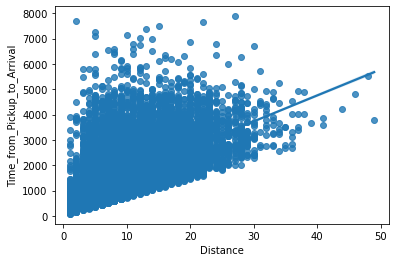

In [29]:
sns.regplot(data = new_train, x = "Distance", y = "Time_from_Pickup_to_Arrival")

<AxesSubplot:xlabel='Avg_speed_km_per_hour'>

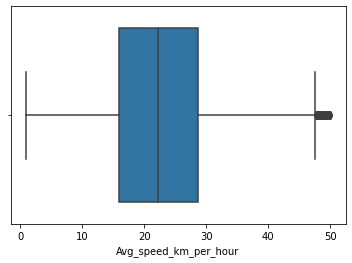

In [30]:
sns.boxplot(x = new_train.Avg_speed_km_per_hour)

In [31]:
new_train.Avg_speed_km_per_hour.describe()

count    19926.000000
mean        22.692061
std          9.246326
min          0.920245
25%         15.974116
50%         22.268041
75%         28.628231
max         50.000000
Name: Avg_speed_km_per_hour, dtype: float64

### There are some average speed that is way too slow
### Average walking speed is 5km
### Too slow: around 7km/h??? 

In [32]:
too_slow = new_train[new_train.Avg_speed_km_per_hour < 7]

In [33]:
time_in_min = too_slow.Time_from_Pickup_to_Arrival / 60
too_slow["Time_from_Pickup_to_Arrival_in_min"] = time_in_min
too_slow

/var/folders/sb/873k54ys2gb7vsfsg26nqk200000gn/T/ipykernel_67463/2828218061.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Order_No       User_Id Vehicle_Type  Platform_Type  \
19     Order_No_19866  User_Id_3722         Bike              1   
24      Order_No_4818  User_Id_2030         Bike              3   
29     Order_No_13398  User_Id_2383         Bike              3   
70     Order_No_27629   User_Id_598         Bike              1   
182     Order_No_6581   User_Id_432         Bike              3   
...               ...           ...          ...            ...   
21084   Order_No_3856  User_Id_1882         Bike              3   
21102  Order_No_11520  User_Id_3517         Bike              3   
21111   Order_No_9301   User_Id_758         Bike              3   
21124  Order_No_18452  User_Id_3171         Bike              3   
21168   Order_No_2978   User_Id_570         Bike              3   

      Personal_or_Business  Placement__Day_of_Month  Placement__Weekday_  \
19                Personal                       28                    2   
24                Business                       11                    2   
29                Business                       28                    3   
70                Business                       21                    1   
182               Business                       20                    1   
...                    ...                      ...                  ...   
21084             Business                        8                    2   
21102             Business                        8                    3   
21111             Business                        5                    2   
21124             Personal                       11                    1   
21168             Business                       18                    2   

      Placement__Time  Confirmation__Day_of_Month  Confirmation__Weekday_  \
19         2:12:53 PM                          28                       2   
24         3:38:33 PM                          11                       2   
29         8:33:07 AM                          28                       3   
70         5:35:02 PM                          21                       1   
182        6:26:07 PM                          20                       1   
...               ...                         ...                     ...   
21084      3:36:40 PM                           8                       2   
21102      3:18:59 PM                           8                       3   
21111      4:19:37 PM                           5                       2   
21124     11:40:58 AM                          11                       1   
21168     11:11:05 AM                          18                       2   

       ... Temperature  Pickup_Lat  Pickup_Long Destination_Lat  \
19     ...        19.4   -1.287290    36.820434       -1.289835   
24     ...        22.5   -1.296974    36.785661       -1.295908   
29     ...        20.5   -1.260899    36.799246       -1.263194   
70     ...         NaN   -1.253680    36.799509       -1.265391   
182    ...         NaN   -1.301201    36.764868       -1.276349   
...    ...         ...         ...          ...             ...   
21084  ...        25.3   -1.258878    36.807974       -1.266378   
21102  ...         NaN   -1.300921    36.828195       -1.299682   
21111  ...         NaN   -1.291787    36.787267       -1.297891   
21124  ...        26.4   -1.280741    36.830891       -1.291325   
21168  ...         NaN   -1.255189    36.782203       -1.286601   

       Destination_Long      Rider_Id Time_from_Pickup_to_Arrival  \
19            36.787270  Rider_Id_447                        4220   
24            36.791433  Rider_Id_596                        3617   
29            36.797624  Rider_Id_407                         713   
70            36.813441  Rider_Id_668                        2786   
182           36.767178  Rider_Id_868                        3124   
...                 ...           ...                         ...   
21084         36.807602  Rider_Id_932                        1713   
21102        

In [34]:
too_slow.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement__Day_of_Month',
       'Placement__Weekday_', 'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month', 'Arrival_at_Pickup__Weekday_',
       'Arrival_at_Pickup__Time', 'Pickup__Day_of_Month', 'Pickup__Weekday_',
       'Pickup__Time', 'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival', 'Time_per_km', 'Avg_speed_km_per_hour',
       'Time_from_Pickup_to_Arrival_in_min'],
      dtype='object')

In [35]:
too_slow[["Pickup__Time", "Arrival_at_Destination__Time", "Distance", 'Time_from_Pickup_to_Arrival', 'Time_from_Pickup_to_Arrival_in_min', 'Avg_speed_km_per_hour']]

Pickup__Time Arrival_at_Destination__Time  Distance  \
19      2:50:07 PM                   4:00:27 PM         5   
24      3:53:17 PM                   4:53:34 PM         3   
29      8:45:10 AM                   8:57:03 AM         1   
70      5:55:28 PM                   6:41:54 PM         4   
182     7:18:44 PM                   8:10:48 PM         3   
...            ...                          ...       ...   
21084   3:59:10 PM                   4:27:43 PM         3   
21102   3:29:25 PM                   5:06:55 PM         9   
21111   4:42:43 PM                   5:00:34 PM         2   
21124  11:49:54 AM                  12:43:33 PM         4   
21168  11:25:45 AM                  12:18:06 PM         6   

       Time_from_Pickup_to_Arrival  Time_from_Pickup_to_Arrival_in_min  \
19                            4220                           70.333333   
24                            3617                           60.283333   
29                             713                           11.883333   
70                            2786                           46.433333   
182                           3124                           52.066667   
...                            ...                                 ...   
21084                         1713                           28.550000   
21102                         5850                           97.500000   
21111                         1071                           17.850000   
21124                         3219                           53.650000   
21168                         3141                           52.350000   

       Avg_speed_km_per_hour  
19                  4.265403  
24                  2.985900  
29                  5.049088  
70                  5.168701  
182                 3.457106  
...                      ...  
21084               6.304729  
21102               5.538462  
21111               6.722689  
21124               4.473439  
21168               6.876791  

[635 rows x 6 columns]

In [36]:
index_to_drop = too_slow.index 
new_train.drop(index_to_drop, inplace = True)

In [37]:
sns.regplot(data = new_train, x = "Distance", y = "Time_from_Pickup_to_Arrival")

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

In [38]:
new_train.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement__Day_of_Month',
       'Placement__Weekday_', 'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month', 'Arrival_at_Pickup__Weekday_',
       'Arrival_at_Pickup__Time', 'Pickup__Day_of_Month', 'Pickup__Weekday_',
       'Pickup__Time', 'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival', 'Time_per_km', 'Avg_speed_km_per_hour'],
      dtype='object')

In [39]:
columns_to_drop = ['Time_per_km', 'Avg_speed_km_per_hour']
train_clean = new_train.drop(columns_to_drop, axis = 1)
train_clean
train_clean.to_csv("train_clean.csv", index=False)

In [40]:
train_clean.head()

Order_No       User_Id Vehicle_Type  Platform_Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal_or_Business  Placement__Day_of_Month  Placement__Weekday_  \
0             Business                        9                    5   
1             Personal                       12                    5   
2             Business                       30                    2   
3             Business                       15                    5   
4             Personal                       13                    1   

  Placement__Time  Confirmation__Day_of_Month  Confirmation__Weekday_  ...  \
0      9:35:46 AM                           9                       5  ...   
1     11:16:16 AM                          12                       5  ...   
2     12:39:25 PM                          30                       2  ...   
3      9:25:34 AM                          15                       5  ...   
4      9:55:18 AM                          13                       1  ...   

  Arrival_at_Destination__Weekday_  Arrival_at_Destination__Time  Distance  \
0                                5                   10:39:55 AM         4   
1                                5                   12:17:22 PM        16   
2                                2                    1:00:38 PM         3   
3                                5                   10:05:27 AM         9   
4                                1                   10:25:37 AM         9   

  Temperature  Pickup_Lat  Pickup_Long Destination_Lat  Destination_Long  \
0        20.4   -1.317755    36.830370       -1.300406         36.829741   
1        26.4   -1.351453    36.899315       -1.295004         36.814358   
2         NaN   -1.308284    36.843419       -1.300921         36.828195   
3        19.2   -1.281301    36.832396       -1.257147         36.795063   
4        15.4   -1.266597    36.792118       -1.295041         36.809817   

       Rider_Id Time_from_Pickup_to_Arrival  
0  Rider_Id_432                         745  
1  Rider_Id_856                        1993  
2  Rider_Id_155                         455  
3  Rider_Id_855                        1341  
4  Rider_Id_770                        1214  

[5 rows x 28 columns]

In [41]:
train_clean.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement__Day_of_Month',
       'Placement__Weekday_', 'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month', 'Arrival_at_Pickup__Weekday_',
       'Arrival_at_Pickup__Time', 'Pickup__Day_of_Month', 'Pickup__Weekday_',
       'Pickup__Time', 'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

### Which variables might affect the linear modeling more? 
- Arrival at Pickup time
- Pickup day of month
- Pickup_weekday
- Distance

In [42]:
(train_clean.Arrival_at_Pickup__Weekday_ == train_clean.Pickup__Weekday_).value_counts()
# Arrival_at_Pickup_Weekday and PickUp_weekday is exactly same

True    19291
dtype: int64

## Data Preprocessing for ML MODEL

Subset the time into 5 categories
- rush_hour_morning: 7:00 - 9:00
- morning: < 7:00, 9:00 - 12:00
- afternoon: 12:00 - 17:00 
- rush_hour_evening: 17:00 - 19:30
- evening: > 19:30 

Do all you can to avoid rush hour, from 7 a.m. to 9 a.m. and between 5 p.m. and 7:30 p.m., when most of Nairobi's main roads are gridlocked.

In [43]:
train_clean.Pickup__Time

0        10:27:30 AM
1        11:44:09 AM
2        12:53:03 PM
3         9:43:06 AM
4        10:05:23 AM
            ...     
21195     1:54:36 PM
21197    10:33:27 AM
21198     5:50:52 PM
21199     9:45:15 AM
21200     2:41:55 PM
Name: Pickup__Time, Length: 19291, dtype: object

In [46]:
train_clean.Pickup__Time
date_time = pd.DatetimeIndex(train_clean.Pickup__Time)
rush_hour_morning = (date_time > "7:00:00") & (date_time < "9:00:00")
morning = (date_time < "7:00:00") | ((date_time > "9:00:00") & (date_time < "12:00:00"))
afternoon = ((date_time > "12:00:00") & (date_time < "17:00:00"))
rush_hour_evening = ((date_time > "17:00:00") & (date_time < "19:30:00"))
evening = date_time > "19:30:00"

In [47]:
train_clean["Rush_hour_morning"] = rush_hour_morning.astype(int)
train_clean["Morning"] = morning.astype(int)
train_clean["Afternoon"] = afternoon.astype(int)
train_clean["Rush_hour_evening"] = rush_hour_evening.astype(int)
train_clean["Evening"] = evening.astype(int)
train_clean.head()

Order_No       User_Id Vehicle_Type  Platform_Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal_or_Business  Placement__Day_of_Month  Placement__Weekday_  \
0             Business                        9                    5   
1             Personal                       12                    5   
2             Business                       30                    2   
3             Business                       15                    5   
4             Personal                       13                    1   

  Placement__Time  Confirmation__Day_of_Month  Confirmation__Weekday_  ...  \
0      9:35:46 AM                           9                       5  ...   
1     11:16:16 AM                          12                       5  ...   
2     12:39:25 PM                          30                       2  ...   
3      9:25:34 AM                          15                       5  ...   
4      9:55:18 AM                          13                       1  ...   

  Pickup_Long  Destination_Lat  Destination_Long      Rider_Id  \
0   36.830370        -1.300406         36.829741  Rider_Id_432   
1   36.899315        -1.295004         36.814358  Rider_Id_856   
2   36.843419        -1.300921         36.828195  Rider_Id_155   
3   36.832396        -1.257147         36.795063  Rider_Id_855   
4   36.792118        -1.295041         36.809817  Rider_Id_770   

   Time_from_Pickup_to_Arrival  Rush_hour_morning Morning  Afternoon  \
0                          745                  0       1          0   
1                         1993                  0       1          0   
2                          455                  0       0          1   
3                         1341                  0       1          0   
4                         1214                  0       1          0   

   Rush_hour_evening Evening  
0                  0       0  
1                  0       0  
2                  0       0  
3                  0       0  
4                  0       0  

[5 rows x 33 columns]

### Preprocess pick up Weekday
- Since weekday is a categorical data we must preprocess it
- Right now it is encoded from 1 - 6, where 1 is Monday. However, if we just use this 6 will be more significant even though they are categorical values 
- Thus, we will use **sin and cos values** to encode. Not using One hot encoding because this will result in larger dimension. Trying to avoid the **"Curse of Dimentionality"**

In [48]:
train_clean.Pickup__Weekday_

0        5
1        5
2        2
3        5
4        1
        ..
21195    6
21197    6
21198    4
21199    3
21200    2
Name: Pickup__Weekday_, Length: 19291, dtype: int64

In [49]:
import math

#### Transformation function
-  takes in a column (Pandas.Series) and return sin and cos values of the column

In [50]:
def transformation(column):
    max_value = column.max()
    sin_values = [math.sin((2*math.pi*x)/max_value) for x in list(column)]
    cos_values = [math.cos((2*math.pi*x)/max_value) for x in list(column)]
    return sin_values, cos_values

In [51]:
dayofweek_sin, dayofweek_cos = transformation(train_clean.Pickup__Weekday_)

In [52]:
train_clean["dayofweek_sin"] = dayofweek_sin
train_clean["dayofweek_cos"] = dayofweek_cos

### Preprocess Pickup day of month

In [53]:
train_clean.Pickup__Day_of_Month

0         9
1        12
2        30
3        15
4        13
         ..
21195     2
21197    13
21198     7
21199     4
21200    26
Name: Pickup__Day_of_Month, Length: 19291, dtype: int64

In [58]:
dayofmonth_sin, dayofmonth_cos = transformation(train_clean.Pickup__Day_of_Month)
train_clean["dayofmonth_sin"] = dayofmonth_sin
train_clean["dayofmonth_cos"] = dayofmonth_cos

In [55]:
sns.scatterplot(x = dayofmonth_sin, y = dayofmonth_cos)

<AxesSubplot:>

#### It captures circular nature of day of month

In [59]:
train_clean.head()

Order_No       User_Id Vehicle_Type  Platform_Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal_or_Business  Placement__Day_of_Month  Placement__Weekday_  \
0             Business                        9                    5   
1             Personal                       12                    5   
2             Business                       30                    2   
3             Business                       15                    5   
4             Personal                       13                    1   

  Placement__Time  Confirmation__Day_of_Month  Confirmation__Weekday_  ...  \
0      9:35:46 AM                           9                       5  ...   
1     11:16:16 AM                          12                       5  ...   
2     12:39:25 PM                          30                       2  ...   
3      9:25:34 AM                          15                       5  ...   
4      9:55:18 AM                          13                       1  ...   

  Time_from_Pickup_to_Arrival  Rush_hour_morning  Morning Afternoon  \
0                         745                  0        1         0   
1                        1993                  0        1         0   
2                         455                  0        0         1   
3                        1341                  0        1         0   
4                        1214                  0        1         0   

   Rush_hour_evening  Evening dayofweek_sin  dayofweek_cos  dayofmonth_sin  \
0                  0        0     -0.974928      -0.222521        0.968077   
1                  0        0     -0.974928      -0.222521        0.651372   
2                  0        0      0.974928      -0.222521       -0.201299   
3                  0        0     -0.974928      -0.222521        0.101168   
4                  0        0      0.781831       0.623490        0.485302   

  dayofmonth_cos  
0      -0.250653  
1      -0.758758  
2       0.979530  
3      -0.994869  
4      -0.874347  

[5 rows x 37 columns]

## End of data Preprocessing

# Data Modeling

In [64]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [60]:
train_clean.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement__Day_of_Month',
       'Placement__Weekday_', 'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month', 'Arrival_at_Pickup__Weekday_',
       'Arrival_at_Pickup__Time', 'Pickup__Day_of_Month', 'Pickup__Weekday_',
       'Pickup__Time', 'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival', 'Rush_hour_morning', 'Morning',
       'Afternoon', 'Rush_hour_evening', 'Evening', 'dayofweek_sin',
       'dayofweek_cos', 'dayofmonth_sin', 'dayofmonth_cos'],
      dtype='object')

Use these variables for modeling: 
- Distance
- Arrival at Pickup time (5 different categories)
    - 'Rush_hour_morning', 'Morning', 'Afternoon', 'Rush_hour_evening', 'Evening',
- Pickup day of month (sin, cos)
- Pickup weekday (sin, cos)


In [62]:
x = train_clean[['Distance', 'Rush_hour_morning', 'Morning',
       'Afternoon', 'Rush_hour_evening', 'Evening', 'dayofweek_sin',
       'dayofweek_cos', 'dayofmonth_sin', 'dayofmonth_cos']]
x

Distance  Rush_hour_morning  Morning  Afternoon  Rush_hour_evening  \
0             4                  0        1          0                  0   
1            16                  0        1          0                  0   
2             3                  0        0          1                  0   
3             9                  0        1          0                  0   
4             9                  0        1          0                  0   
...         ...                ...      ...        ...                ...   
21195        17                  0        0          1                  0   
21197         7                  0        1          0                  0   
21198        20                  0        0          0                  1   
21199        13                  0        1          0                  0   
21200        12                  0        0          1                  0   

       Evening  dayofweek_sin  dayofweek_cos  dayofmonth_sin  dayofmonth_cos  
0            0      -0.974928      -0.222521        0.968077       -0.250653  
1            0      -0.974928      -0.222521        0.651372       -0.758758  
2            0       0.974928      -0.222521       -0.201299        0.979530  
3            0      -0.974928      -0.222521        0.101168       -0.994869  
4            0       0.781831       0.623490        0.485302       -0.874347  
...        ...            ...            ...             ...             ...  
21195        0      -0.781831       0.623490        0.394356        0.918958  
21197        0      -0.781831       0.623490        0.485302       -0.874347  
21198        0      -0.433884      -0.900969        0.988468        0.151428  
21199        0       0.433884      -0.900969        0.724793        0.688967  
21200        0       0.974928      -0.222521       -0.848644        0.528964  

[19291 rows x 10 columns]

In [65]:
y = train_clean.Time_from_Pickup_to_Arrival
y

0         745
1        1993
2         455
3        1341
4        1214
         ... 
21195    2325
21197     770
21198    2953
21199    1380
21200    2128
Name: Time_from_Pickup_to_Arrival, Length: 19291, dtype: int64

In [69]:
lm = sm.OLS(y, x)

In [70]:
res = lm.fit()

In [71]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Time_from_Pickup_to_Arrival   R-squared (uncentered):                   0.873
Model:                                     OLS   Adj. R-squared (uncentered):              0.873
Method:                          Least Squares   F-statistic:                          1.322e+04
Date:                         Mon, 25 Jul 2022   Prob (F-statistic):                        0.00
Time:                                 15:41:34   Log-Likelihood:                     -1.5253e+05
No. Observations:                        19291   AIC:                                  3.051e+05
Df Residuals:                            19281   BIC:                                  3.052e+05
Df Model:                                   10                                                  
Covariance Type:                     nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Distance            110.3839      0.843    131.014      0.000     108.732     112.035
Rush_hour_morning   412.4897     34.257     12.041      0.000     345.344     479.635
Morning             468.8637     12.024     38.993      0.000     445.295     492.432
Afternoon           532.4363     10.578     50.333      0.000     511.702     553.171
Rush_hour_evening   560.1352     20.240     27.675      0.000     520.464     599.807
Evening             398.4773     59.257      6.725      0.000     282.329     514.626
dayofweek_sin        -3.0550      6.427     -0.475      0.635     -15.653       9.543
dayofweek_cos       -57.0824      8.106     -7.042      0.000     -72.972     -41.193
dayofmonth_sin       19.4586      6.641      2.930      0.003       6.441      32.476
dayofmonth_cos       -1.3519      6.767     -0.200      0.842     -14.617      11.913
==============================================================================
Omnibus:                     6528.841   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24584.120
Skew:                           1.675   Prob(JB):                         0.00
Kurtosis:                       7.400   Cond. No.                         141.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### All the p values < 0.05 and Prob(F-stat) < 0.05
### Which means that are model is pretty good. 

## Train and Test the model using sklearn

In [85]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

LinearRegression()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [114]:
y_test.values

array([1172,  547, 1524, ..., 1795, 1823,  681])

In [105]:
lm.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = lm.predict(X_test)
np.set_printoptions(precision=2)
result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)

In [121]:
result[1:10]

array([[ 881.54,  547.  ],
       [1590.89, 1524.  ],
       [1461.74, 1572.  ],
       [2236.16, 2257.  ],
       [1556.56, 1618.  ],
       [ 900.7 ,  919.  ],
       [1896.72, 1069.  ],
       [2270.9 , 3638.  ],
       [ 960.86,  584.  ]])

In [123]:
print("Hello", 1)

Hello 1


In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE: ", mean_squared_error(y_true= y_test, y_pred=y_pred))
print("MAE: ", mean_absolute_error(y_true= y_test, y_pred=y_pred))
print("R2 : ", r2_score(y_true= y_test, y_pred=y_pred))


MSE:  408502.28310636454
MAE:  461.54684150508854
R2 :  0.4828509403102256


### Use cross validation

In [142]:
x

Distance  Rush_hour_morning  Morning  Afternoon  Rush_hour_evening  \
0             4                  0        1          0                  0   
1            16                  0        1          0                  0   
2             3                  0        0          1                  0   
3             9                  0        1          0                  0   
4             9                  0        1          0                  0   
...         ...                ...      ...        ...                ...   
21195        17                  0        0          1                  0   
21197         7                  0        1          0                  0   
21198        20                  0        0          0                  1   
21199        13                  0        1          0                  0   
21200        12                  0        0          1                  0   

       Evening  dayofweek_sin  dayofweek_cos  dayofmonth_sin  dayofmonth_cos  
0            0      -0.974928      -0.222521        0.968077       -0.250653  
1            0      -0.974928      -0.222521        0.651372       -0.758758  
2            0       0.974928      -0.222521       -0.201299        0.979530  
3            0      -0.974928      -0.222521        0.101168       -0.994869  
4            0       0.781831       0.623490        0.485302       -0.874347  
...        ...            ...            ...             ...             ...  
21195        0      -0.781831       0.623490        0.394356        0.918958  
21197        0      -0.781831       0.623490        0.485302       -0.874347  
21198        0      -0.433884      -0.900969        0.988468        0.151428  
21199        0       0.433884      -0.900969        0.724793        0.688967  
21200        0       0.974928      -0.222521       -0.848644        0.528964  

[19291 rows x 10 columns]

In [146]:
from sklearn.model_selection import cross_validate
scoring_functions = {"negMSE": "neg_mean_squared_error", "negMAE": "neg_mean_absolute_error"}
cv_complicated = cross_validate(estimator=lm, X= x , y= y, scoring=scoring_functions, cv=10, return_train_score=True)
cv_distance_only = cross_validate(estimator=lm, X= x[["Distance"]], y= y, scoring=scoring_functions, cv=10, return_train_score=True)
cv_complicated_df = pd.DataFrame(cv_complicated)
cv_distance_only_df = pd.DataFrame(cv_distance_only)

In [149]:
cv_complicated_df.describe()

fit_time  score_time    test_negMSE   train_negMSE  test_negMAE  \
count  10.000000   10.000000      10.000000      10.000000    10.000000   
mean    0.009809    0.001665 -432268.930510 -431643.606439  -471.576315   
std     0.012779    0.000982   22422.952459    2493.565736     8.539706   
min     0.003635    0.001084 -469303.346776 -435436.742330  -480.789127   
25%     0.003986    0.001115 -440188.336168 -432582.322020  -477.113763   
50%     0.004504    0.001236 -431990.330893 -431664.598254  -472.588447   
75%     0.007057    0.001398 -423803.664413 -430760.080157  -470.452140   
max     0.044491    0.003617 -398216.089500 -427526.697252  -450.236316   

       train_negMAE  
count     10.000000  
mean    -471.204445  
std        1.201815  
min     -473.983028  
25%     -471.534271  
50%     -471.027116  
75%     -470.544940  
max     -469.442349

In [150]:
cv_distance_only_df.describe()

fit_time  score_time    test_negMSE   train_negMSE  test_negMAE  \
count  10.000000   10.000000      10.000000      10.000000    10.000000   
mean    0.001804    0.000836 -434404.671283 -434309.234992  -473.280247   
std     0.000799    0.000383   21922.657529    2434.079681     7.947070   
min     0.001426    0.000666 -471194.946787 -437866.047309  -481.968355   
25%     0.001450    0.000686 -441919.785569 -435400.029146  -478.491140   
50%     0.001515    0.000701 -434748.871660 -434266.242643  -474.361502   
75%     0.001645    0.000723 -424581.878266 -433471.505591  -471.863481   
max     0.004038    0.001912 -402367.710242 -430234.005638  -453.724269   

       train_negMAE  
count     10.000000  
mean    -473.222606  
std        1.095716  
min     -475.790974  
25%     -473.508591  
50%     -473.069602  
75%     -472.636087  
max     -471.635369

In [152]:
test = pd.read_csv("Test.csv")

In [154]:
test.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')

### Use only the distance variable for the test

In [166]:
x = train_clean[["Distance"]]
y = train_clean.Time_from_Pickup_to_Arrival
lm.fit(x, y)

LinearRegression()

In [171]:
X = test[['Distance (KM)']]
y_pred = lm.predict(X)

/Users/asahikuroki222/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Distance (KM)
Feature names seen at fit time, yet now missing:
- Distance




In [172]:
y_pred

array([1409.75, 1078.87, 1078.87, ..., 1630.34, 2512.68, 1409.75])

In [177]:
submission = pd.DataFrame()
submission["Order_No"] = test["Order No"]
submission["Time From Pickup to Arrival"] = y_pred

In [184]:
submission.isnull().value_counts()

Order_No  Time From Pickup to Arrival
False     False                          7068
dtype: int64

In [185]:
submission.to_csv("submission.csv", index = False)

## *Number of orders per day*

In [ ]:
number_of_orders_per_day = df.Placement__Weekday_.value_counts().sort_index()
print(number_of_orders_per_day)
df.Placement__Weekday_.value_counts(normalize=True).sort_index()

In [ ]:
sns.histplot(data = df, x = "Placement__Weekday_")

### We could see that most of the orders are placed on weekdays
### Maybe we could groupby days and see the average and sum in those

#### Calculate number of riders are there per day

In [ ]:
number_of_rider_per_day = df.groupby(["Placement__Weekday_"])["Rider_Id"].nunique()
number_of_rider_per_day = number_of_rider_per_day.values
number_of_rider_per_day

#### Group by weekdays

In [ ]:
groupby_weekday_df = df.groupby("Placement__Weekday_").agg(["mean", "sum"])
groupby_weekday = groupby_weekday_df[["Distance", "Time_from_Pickup_to_Arrival"]]
groupby_weekday.reset_index(inplace=True)
groupby_weekday

In [ ]:
groupby_weekday["Number_of_riders"] = number_of_rider_per_day.tolist()
groupby_weekday["Number_of_orders"] = number_of_orders_per_day.tolist()
groupby_weekday

In [ ]:
groupby_weekday.columns = groupby_weekday.columns.map('_'.join)
groupby_weekday.columns

In [ ]:
groupby_weekday

In [ ]:
# Speeed = distance / time
# Distance_mean => Average distance covered per order
# Time_from_Pickup_to_Arrival_mean => Average time per order
avg_speed_per_day = groupby_weekday.Distance_mean / (groupby_weekday.Time_from_Pickup_to_Arrival_mean/3600)
print("Average Speed per day")
print(avg_speed_per_day)

### Average Speed per person is faster on weekends

In [ ]:
df

In [ ]:
sns.catplot(data = df, x = "Placement__Weekday_", y = "Distance", kind = "box")

In [ ]:
sns.catplot(data = avg_by_weekday, x = "Placement__Weekday__", y = "Distance_mean", kind = "bar") 

In [ ]:
sns.catplot(data = avg_by_weekday, x = "Placement__Weekday__", y = "Distance_sum", kind = "bar") 

In [ ]:
sns.catplot(data = avg_by_weekday, x = "Placement__Weekday__", y = "Time_from_Pickup_to_Arrival_mean", kind = "bar")

In [ ]:
sns.catplot(data = avg_by_weekday, x = "Placement__Weekday__", y = "Time_from_Pickup_to_Arrival_sum", kind = "bar")

In [ ]:
sns.histplot(data = df, x = "Placement__Day_of_Month")

### Hmm this is kind of interesting, a lot of orders are placed on the 1th, 15th and 30th

In [ ]:
groupby_day_df = df.groupby("Placement__Day_of_Month").agg(["mean", "sum"])
groupby_day = groupby_day = groupby_day_df[["Distance", "Time_from_Pickup_to_Arrival"]]
groupby_day

In [ ]:
order_per_day = df.Placement__Day_of_Month.value_counts().sort_index()
order_per_day

In [ ]:
groupby_day["Order_per_day"] = order_per_day
groupby_day

In [ ]:
groupby_day.reset_index()
groupby_day.columns = groupby_day.columns.map('_'.join)
groupby_day

## Question
- ###  If the distance is similar why are there so much variation in Time from pickup to arrival. We can investigate that more
- ###  Might be because of the riders experience? => If so we can *groupby* riders

In [ ]:
Avg_by_rider = df.groupby("Rider_Id")[["Distance", "Time_from_Pickup_to_Arrival", "Average_Rating", "No_Of_Orders", "Age", "Temperature"]].agg("mean")
Avg_by_rider

### From this data frame we can calculate how much time each rider take per km on average

In [ ]:
time_per_km

In [ ]:
time_per_km = Avg_by_rider.Time_from_Pickup_to_Arrival / Avg_by_rider.Distance
average_speed = Avg_by_rider.Distance / Avg_by_rider.Time_from_Pickup_to_Arrival
Avg_by_rider["Time_per_km"] = time_per_km
Avg_by_rider["Average_speed"] = average_speed
Avg_by_rider.head()

In [ ]:
sns.scatterplot(data = Avg_by_rider,  x = "Distance", y = "Time_from_Pickup_to_Arrival")

In [ ]:
sns.regplot(data = Avg_by_rider,  x = "Distance", y = "Time_from_Pickup_to_Arrival")

In [ ]:
sns.scatterplot(data = Avg_by_rider, x = "Age", y = "Average_speed") 

In [ ]:
sns.pairplot(data = Avg_by_rider)

In [ ]:
df.columns

In [ ]:
(df.Distance < 20).value_counts()

In [ ]:
df_dislessthan20 = df[df.Distance < 20]
df_dislessthan20

In [ ]:
Avg_order_by_rider = df.groupby("Rider_Id")[["Time_from_Pickup_to_Arrival", "No_Of_Orders"]].agg("mean")
Avg_order_by_rider
sns.scatterplot(data = Avg_order_by_rider,  x = "No_Of_Orders", y = "Time_from_Pickup_to_Arrival")